In [1]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from numpy import reshape
import numpy as np
import seaborn as sns
import pandas as pd  
from tqdm import tqdm
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler
import pickle
import einops

# MIMIC embeddings data t-sne

In [266]:
df = pickle.load(open('new_train_data_unique_embed_CNEP.pickle', 'rb'))

In [267]:
df.keys(), len(df['labels'])

(dict_keys(['labels', 'inputs', 'embeds', 'embeds_events']), 13181)

In [268]:
x0 = df['inputs']
x0 = einops.rearrange(x0, 'a h e -> a (h e)')

x1 = df['embeds']
x2 = df['embeds_events']
y = df['labels']

In [269]:
x0.shape

(13181, 18720)

In [270]:
# mask = y == 0
# x = np.zeros_like(x1)
# x[mask] = x2[mask]

# mask = y == 1
# x[mask] = x1[mask]

In [271]:
# stack horizontally
# X = np.hstack([x0,x1,x2]) #x1, x2])

# stack vertically
X = np.concatenate([x1, x2])

In [272]:
from numpy import linalg as LA

y = LA.norm(X, axis=-1)
X.shape, y.shape

((26362, 700), (26362,))

/Users/jplasser/miniconda3/envs/cnep/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jplasser/miniconda3/envs/cnep/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[0, 1, 2, 3, 4, 5, 6, 7, 8, 32]


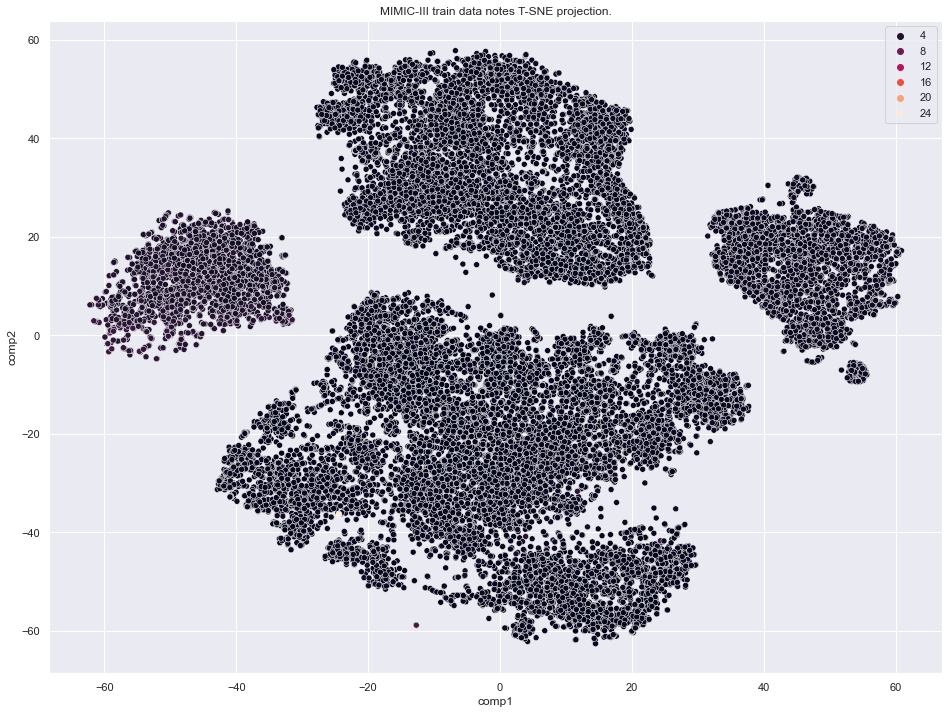

In [273]:
# embeds = df['embeds']
# embeds_events = df['embeds_events']

# X = np.concatenate([embeds, embeds_events])
# y = np.concatenate([df['labels'], df['labels']])

# tsne = TSNE(n_components=2, verbose=1, perplexity=30, learning_rate=10,
#             n_iter=1000, init='pca', random_state=123)
tsne = TSNE(n_components=2, verbose=0)
z = tsne.fit_transform(X)

bins = 32
shared_bins = np.histogram_bin_edges(y, bins=bins)
shared_bins[:10]
labels = list(set([(shared_bins < h).sum() for h in y]))
labels.sort()
print(labels)

y_ = [labels.index((shared_bins < h).sum()) for h in y]
n_colors = len(set(y_))

df_ = pd.DataFrame()
df_["y"] = y
df_["comp1"] = z[:,0]
df_["comp2"] = z[:,1]
    
sns.set(rc={'figure.figsize':(16,12)})
sns_plot = sns.scatterplot(x="comp1", y="comp2", hue=df_.y.tolist(),
                palette=sns.color_palette("rocket", as_cmap=True), #sns.color_palette("rocket", n_colors),
                data=df_)
sns_plot.set(title=f"MIMIC-III train data notes T-SNE projection.")
#fig = sns_plot.get_figure()
#fig.savefig(f"tsne_plot.png")
plt.show()

In [ ]:
import umap
from sklearn.preprocessing import StandardScaler


In [274]:
reducer = umap.UMAP()

In [275]:
scaled_X = StandardScaler().fit_transform(X)

In [276]:
X.shape

(26362, 700)

In [277]:
embedding = reducer.fit_transform(X)
embedding.shape

(26362, 2)

/Users/jplasser/miniconda3/envs/cnep/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'UMAP projection of the MIMIC-III notes embedding dataset')

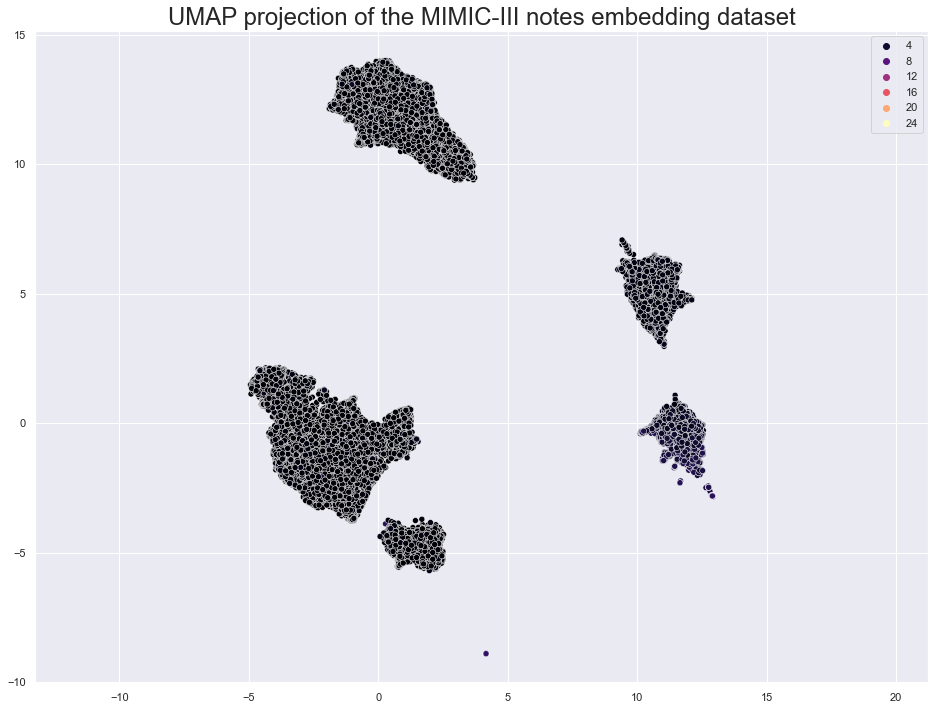

In [278]:
sns.scatterplot(
    embedding[:, 0],
    embedding[:, 1],
    hue=y,
    palette=sns.color_palette("magma", as_cmap=True)
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the MIMIC-III notes embedding dataset', fontsize=24)